# 1. K近邻算法（KNN）

采用测量不同特征值之间的距离方法进行分类

    优点：精度高，对异常值不敏感，无数据输入假定

    缺点：计算复杂度高，空间复杂度高

    适用数据范围：数值型和标称型

    工作原理：存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据与所属分类的对应关系。输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。


    一般来说，我们只选择样本数据集中前K个最相似的数据，这就是K-近邻中K的出处，通常K是不大于20的整数。最后选择K个最相似数据中出现次数最多的分类，作为新数据的分类

                                                   K近邻算法的一般流程
    （1）收集数据：可以使用任何方法

    （2）准备数据：距离计算所需要的数值，最好是结构化的数据格式

    （3）分析数据：可以使用任何方法

    （4）训练算法：此步骤不适应KNN算法

    （5）测试算法：计算错误率

    （6）使用算法：首先需要输入样本数据和结构化的输出结果，然后运行KNN判断输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理

1.1.1准备python导入数据

In [1]:
from numpy import *
import operator
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels
group,labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


1.1.2 实施KNN算法

    （1）计算已知类别数据集中的点到当前点之间的距离(欧式距离:((XA0-XB0)**2+(XA1-XB1)**2)**0.5)

    （2）按照距离递增次序排序

    （3）选取与当前距离最小的k个点

    （4）确定前k个点所在类别出现的频率

    （5）返回前k个点出现频率最高的类别作为当前点的预测分类

In [2]:
#inX:用于分类的输入向量，dataSet：训练样本集，labels：样本标签

def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1))-dataSet #tile我觉得就是重复次数，dataSetSize控制行数，1：控制列数
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]
classify0([0,0],group,labels,3)

'B'

1.2使用KNN改进约会网站的配对效果

1.2.1 从文本中解析数据

    数据包括4列：前3列为3种特征：1.每年获得的飞行乘客里程数；2.玩视频游戏所消耗时间百分百；3.每周消耗的冰淇淋工升数。最后一列为结果，也可以叫做标签，也有3种：不喜欢的人，魅力一般的人，极具魅力的人

In [3]:
#将文本记录转换为Numpy的解析程序
def file2matrix(filename):
    love_dictionary = {'largeDoses':3,'smallDoses':2,'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOLines = len(arrayOLines)
    returnMat = zeros((numberOLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        #转换为整型主要是为了后面可视化观察用
        if (listFromLine[-1].isdigit()):
            classLabelVector.append(listFromLine[-1])
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
datingDataMat,datingLabels = file2matrix('D:\AGAME\MachineLearning\machinelearninginaction\Ch02/datingTestSet.txt')
print(datingDataMat)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

1.2.2 分析数据：使用Matplotlib创建散点图

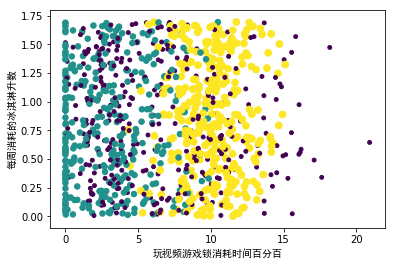

In [5]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
#前一个为颜色，后一个为大小size
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.xlabel('玩视频游戏锁消耗时间百分百',fontproperties="SimHei")#字体为黑体
plt.ylabel('每周消耗的冰淇淋升数',fontproperties="SimHei")
plt.show()

1.3归一化特征值

    将数字特征值转化到0和1之间

In [6]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)#0表示列，1表示行
    maxVals = dataSet.max(0)
    ranges = maxVals-minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet-tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals
normDataSet,ranges,minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


1.4测试算法：作为完整程序验证分类器

    使用错误率来检测分类器的性能

In [7]:
#分类器针对约会网站的测试代码
def datingClassTest():
    hoRatio = 0.10 #用10%作为测试集,剩下作为训练集
    datingDataMat,datingLabels = file2matrix('D:\AGAME\MachineLearning\machinelearninginaction\Ch02/datingTestSet.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if(classifierResult!=datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is:%f"% (errorCount/float(numTestVecs)))
datingClassTest()
        

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

1.5使用算法：构建可用的系统

In [8]:
def classifyPerson():

    resultList = ['not at all', 'in small doses', 'in large doses']

    percentTats = float(input(\

                                  "percentage of time spent playing video games?"))

    ffMiles = float(input("frequent flier miles earned per year?"))

    iceCream = float(input("liters of ice cream consumed per year?"))

    datingDataMat, datingLabels = file2matrix('D:\AGAME\MachineLearning\machinelearninginaction\Ch02/datingTestSet.txt')

    normMat, ranges, minVals = autoNorm(datingDataMat)

    inArr = array([ffMiles, percentTats, iceCream ])

    classifierResult = classify0((inArr - \

                                  minVals)/ranges, normMat, datingLabels, 3)

    print("You will probably like this person: %s" % resultList[classifierResult - 1])
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


1.6 KNN实现手写数字识别

1.6.1 将图像转换为数字向量

In [9]:
from os import listdir
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect
testVector = img2vector('D:\\AGAME\MachineLearning\\KNN\\testDigits/0_0.txt')
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

1.6.2 测试算法：使用K-近邻算法识别手写数字

In [10]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('D:\\AGAME\\MachineLearning\\KNN\\trainingDigits')#获取目录内容
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    #从文件名解析分类数字
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('D:\\AGAME\\MachineLearning\\KNN\\trainingDigits/%s'%fileNameStr)
    testFileList= listdir('D:\\AGAME\\MachineLearning\\KNN\\testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('D:\\AGAME\\MachineLearning\\KNN\\testDigits/%s'%fileNameStr)
        classFileResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        print("the classifier came back with: %d,the real answer is: %d"%(classFileResult,classNumStr))
        if(classFileResult!=classNumStr):
            errorCount += 1.0
    print("the total number of errors is:%d"%errorCount)
    print("the total error rate is:%f"%(errorCount/float(mTest)))
handwritingClassTest()

the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classifier came back with: 0,the real answer is: 0
the classi

the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classifier came back with: 1,the real answer is: 1
the classi

the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classifier came back with: 3,the real answer is: 3
the classi

the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classifier came back with: 4,the real answer is: 4
the classi

the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classifier came back with: 6,the real answer is: 6
the classi

the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classifier came back with: 7,the real answer is: 7
the classi

the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 9,the real answer is: 9
the classifier came back with: 7,the real answer is: 9
the classi